In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns   

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.drop(["id", "Unnamed: 32"], axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features (mean = 0, std = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=df.columns)


In [5]:
# Splitting the DataSet.
from sklearn.model_selection import train_test_split
X_scaled = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = []

# 1️⃣ SVM with Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# Compute Metrics
accuracy_linear = accuracy_score(y_test, y_pred_linear)
precision_linear = precision_score(y_test, y_pred_linear, average='macro')
recall_linear = recall_score(y_test, y_pred_linear, average='macro')
f1_linear = f1_score(y_test, y_pred_linear, average='macro')

results.append(['linear', 1, 'N/A', 'N/A', accuracy_linear, precision_linear, recall_linear, f1_linear])

# 2️⃣ SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', C=10, gamma=0.01)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf, average='macro')
recall_rbf = recall_score(y_test, y_pred_rbf, average='macro')
f1_rbf = f1_score(y_test, y_pred_rbf, average='macro')

results.append(['rbf', 10, 0.01, 'N/A', accuracy_rbf, precision_rbf, recall_rbf, f1_rbf])

# 3️⃣ SVM with Polynomial Kernel (Degree 3)
svm_poly = SVC(kernel='poly', C=1, gamma='scale', degree=3)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)

accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly, average='macro')
recall_poly = recall_score(y_test, y_pred_poly, average='macro')
f1_poly = f1_score(y_test, y_pred_poly, average='macro')

results.append(['poly', 1, 'scale', 3, accuracy_poly, precision_poly, recall_poly, f1_poly])

# 4️⃣ SVM with Sigmoid Kernel
svm_sigmoid = SVC(kernel='sigmoid', C=0.1, gamma='auto')
svm_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = svm_sigmoid.predict(X_test)

accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
precision_sigmoid = precision_score(y_test, y_pred_sigmoid, average='macro')
recall_sigmoid = recall_score(y_test, y_pred_sigmoid, average='macro')
f1_sigmoid = f1_score(y_test, y_pred_sigmoid, average='macro')

results.append(['sigmoid', 0.1, 'auto', 'N/A', accuracy_sigmoid, precision_sigmoid, recall_sigmoid, f1_sigmoid])

# Convert results to DataFrame
columns = ['Kernel', 'C', 'Gamma', 'Degree', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
results_df = pd.DataFrame(results, columns=columns)
print(results_df)

# Apply PCA and re-evaluate best SVM
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

svm_pca = SVC(kernel='rbf', C=1, gamma='scale')  # Using best default settings
svm_pca.fit(X_train_pca, y_train)
y_pred_pca = svm_pca.predict(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca, average='macro')
recall_pca = recall_score(y_test, y_pred_pca, average='macro')
f1_pca = f1_score(y_test, y_pred_pca, average='macro')

print("\nSVM Performance After Applying PCA:")
print(f"Accuracy: {accuracy_pca:.4f}")
print(f"Precision: {precision_pca:.4f}")
print(f"Recall: {recall_pca:.4f}")
print(f"F1-Score: {f1_pca:.4f}")

# Save results to CSV
results_df.to_csv("svm_separate_hyperparameters.csv", index=False)
print("\nResults saved to 'svm_separate_hyperparameters.csv'.")

    Kernel     C  Gamma Degree  Accuracy  Precision    Recall  F1-Score
0   linear   1.0    N/A    N/A  0.921053   0.927518  0.902778  0.912837
1      rbf  10.0   0.01    N/A  0.640351   0.818584  0.511905  0.412445
2     poly   1.0  scale      3  0.894737   0.928571  0.857143  0.878205
3  sigmoid   0.1   auto    N/A  0.631579   0.315789  0.500000  0.387097

SVM Performance After Applying PCA:
Accuracy: 0.9474
Precision: 0.9610
Recall: 0.9302
F1-Score: 0.9422

Results saved to 'svm_separate_hyperparameters.csv'.


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



LDA Model Accuracy: 0.6228

Classification Report:
              precision    recall  f1-score   support

      Benign       0.64      0.90      0.75        71
   Malignant       0.50      0.16      0.25        43

    accuracy                           0.62       114
   macro avg       0.57      0.53      0.50       114
weighted avg       0.59      0.62      0.56       114



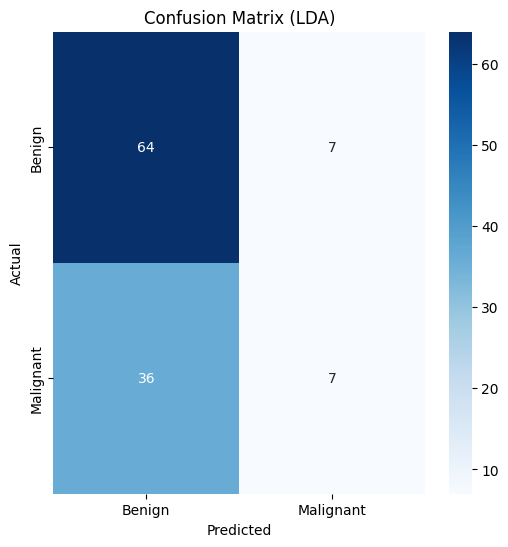

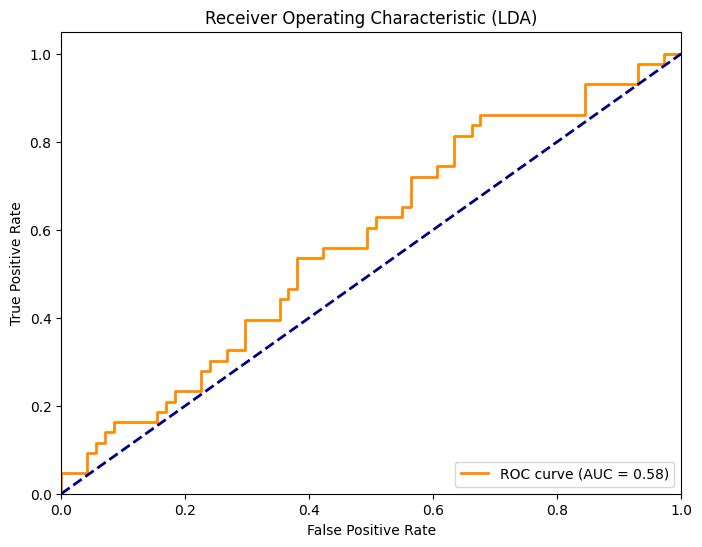


Top 10 Most Important Features:
                   Feature  LDA_Coefficient
14           smoothness_se        66.145487
9   fractal_dimension_mean        51.021498
6           concavity_mean        28.974197
27    concave points_worst        25.876954
5         compactness_mean        13.571492
28          symmetry_worst         6.806761
4          smoothness_mean         5.334546
25       compactness_worst         1.735256
20            radius_worst         0.885724
12            perimeter_se         0.507165


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                            classification_report, roc_curve, auc)
 


# 3. Train and evaluate LDA model
def train_lda(X_train, y_train):
    """Train Linear Discriminant Analysis model"""
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    return lda

def evaluate_model(model, X_test, y_test):
    """Evaluate model performance"""
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    return accuracy, report, cm, fpr, tpr, roc_auc

# 4. Visualization functions
def plot_confusion_matrix(cm):
    """Plot confusion matrix"""
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Benign', 'Malignant'],
                yticklabels=['Benign', 'Malignant'])
    plt.title('Confusion Matrix (LDA)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

def plot_roc_curve(fpr, tpr, roc_auc):
    """Plot ROC curve"""
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (LDA)')
    plt.legend(loc="lower right")
    plt.show()

# Main execution
if __name__ == "__main__":
    
    # Step 3: Train LDA
    lda_model = train_lda(X_train, y_train)
    
    # Step 4: Evaluate
    accuracy, report, cm, fpr, tpr, roc_auc = evaluate_model(
        lda_model, X_test, y_test)
    
    # Display results
    print(f"\nLDA Model Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(report)
    
    # Visualizations
    plot_confusion_matrix(cm)
    plot_roc_curve(fpr, tpr, roc_auc)
    
    # Print coefficients (feature importance)
    print("\nTop 10 Most Important Features:")
    coef_df = pd.DataFrame({
        'Feature': df.drop('diagnosis', axis=1).columns,
        'LDA_Coefficient': lda_model.coef_[0]
    }).sort_values('LDA_Coefficient', ascending=False)
    print(coef_df.head(10))


Training Random Forest with Grid Search...
Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Best CV accuracy: 0.6374

Test Accuracy: 0.6140

Classification Report:
              precision    recall  f1-score   support

      Benign       0.62      0.96      0.76        71
   Malignant       0.40      0.05      0.08        43

    accuracy                           0.61       114
   macro avg       0.51      0.50      0.42       114
weighted avg       0.54      0.61      0.50       114



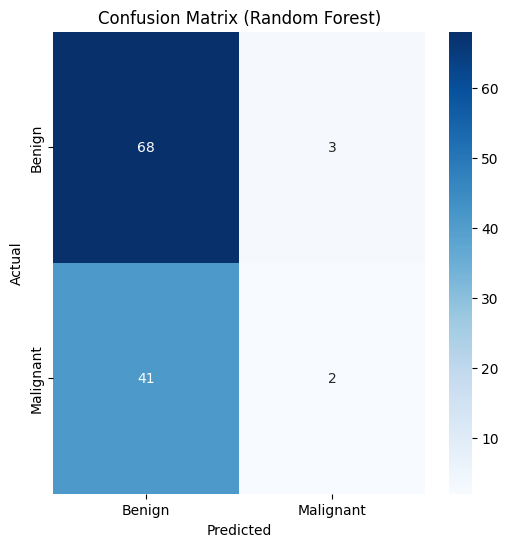

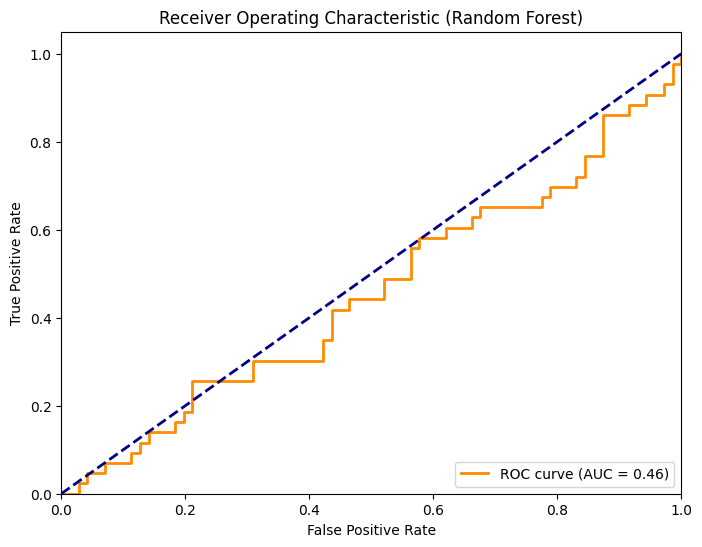

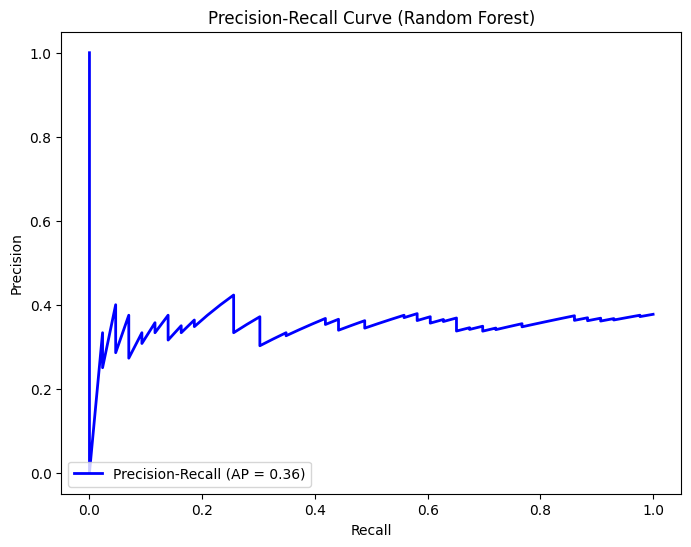

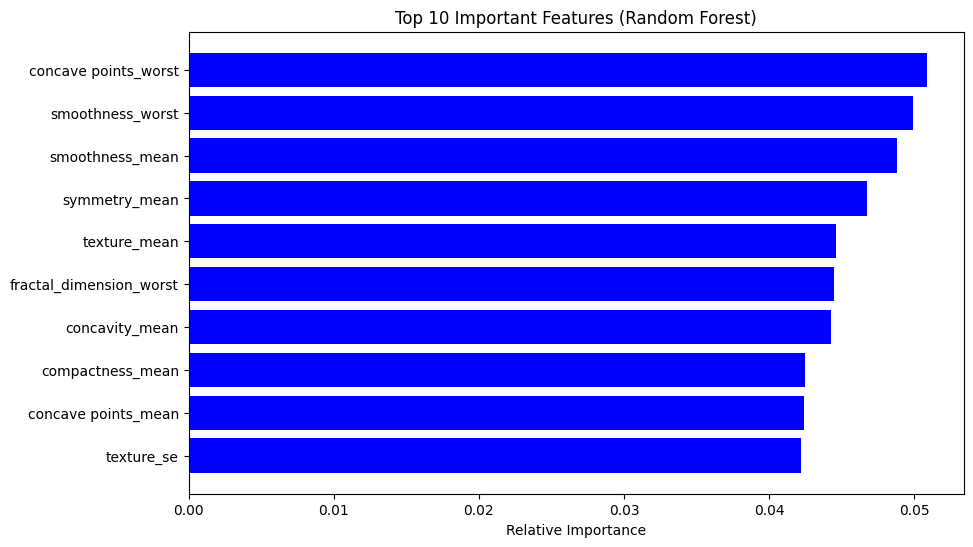


Calculating permutation importance...

Top 10 Features by Permutation Importance:
                    Feature  Importance
4           smoothness_mean    0.008772
14            smoothness_se    0.008772
24         smoothness_worst    0.008772
29  fractal_dimension_worst    0.008772
17        concave points_se    0.007895
21            texture_worst    0.007895
25        compactness_worst    0.007018
9    fractal_dimension_mean    0.007018
11               texture_se    0.006140
23               area_worst    0.005263


In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                            classification_report, roc_curve, auc,
                            precision_recall_curve, average_precision_score)
from sklearn.inspection import permutation_importance


# 3. Train and tune Random Forest
def train_random_forest(X_train, y_train):
    """Train and optimize Random Forest model"""
    # Base model
    rf = RandomForestClassifier(random_state=42)
    
    # Hyperparameter grid for tuning
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10],
        'max_features': ['sqrt', 'log2']
    }
    
    # Grid search with 5-fold cross-validation
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=5,
        n_jobs=-1,
        scoring='accuracy'
    )
    
    grid_search.fit(X_train, y_train)
    
    # Get best model
    best_rf = grid_search.best_estimator_
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV accuracy: {grid_search.best_score_:.4f}")
    
    return best_rf

# 4. Evaluate model
def evaluate_model(model, X_test, y_test):
    """Evaluate model performance with multiple metrics"""
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for malignant class
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    avg_precision = average_precision_score(y_test, y_prob)
    
    return accuracy, report, cm, fpr, tpr, roc_auc, precision, recall, avg_precision

# 5. Visualization functions
def plot_confusion_matrix(cm):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Benign', 'Malignant'],
                yticklabels=['Benign', 'Malignant'])
    plt.title('Confusion Matrix (Random Forest)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

def plot_roc_curve(fpr, tpr, roc_auc):
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (Random Forest)')
    plt.legend(loc="lower right")
    plt.show()

def plot_precision_recall_curve(precision, recall, avg_precision):
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2,
             label=f'Precision-Recall (AP = {avg_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve (Random Forest)')
    plt.legend(loc="lower left")
    plt.show()

def plot_feature_importance(model, feature_names):
    """Plot feature importance from Random Forest"""
    importances = model.feature_importances_
    indices = np.argsort(importances)[-10:]  # Top 10 features
    
    plt.figure(figsize=(10, 6))
    plt.title('Top 10 Important Features (Random Forest)')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

# Main execution
if __name__ == "__main__":
    
    # Step 3: Train Random Forest with hyperparameter tuning
    print("\nTraining Random Forest with Grid Search...")
    rf_model = train_random_forest(X_train, y_train)
    
    # Step 4: Evaluate
    (accuracy, report, cm, fpr, tpr, 
     roc_auc, precision, recall, avg_precision) = evaluate_model(
        rf_model, X_test, y_test)
    
    # Display results
    print(f"\nTest Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(report)
    
    # Visualizations
    plot_confusion_matrix(cm)
    plot_roc_curve(fpr, tpr, roc_auc)
    plot_precision_recall_curve(precision, recall, avg_precision)
    plot_feature_importance(rf_model, X_train.columns)
    
    # Additional: Permutation Importance
    print("\nCalculating permutation importance...")
    result = permutation_importance(
        rf_model, X_test, y_test, n_repeats=10, random_state=42)
    
    perm_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': result.importances_mean
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 10 Features by Permutation Importance:")
    print(perm_importance.head(10))

Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1 Score,Confusion Matrix
0,Random Forest,0.973684,1.000000,0.928571,0.962963,[[72 0] [ 3 39]]
1,SVM (RBF),0.982456,1.000000,0.952381,0.975610,[[72 0] [ 2 40]]
2,LDA,0.964912,1.000000,0.904762,0.950000,[[72 0] [ 4 38]]


C:\Users\HP\AppData\Local\Temp\ipykernel_12516\1630818852.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_12516\1630818852.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_12516\1630818852.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_12

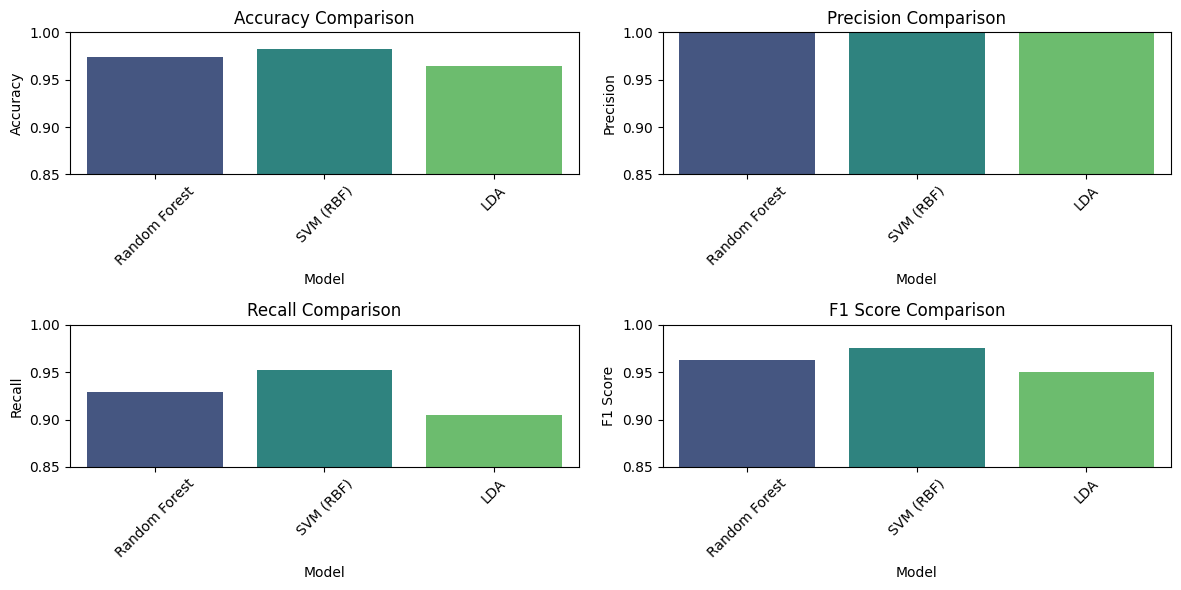

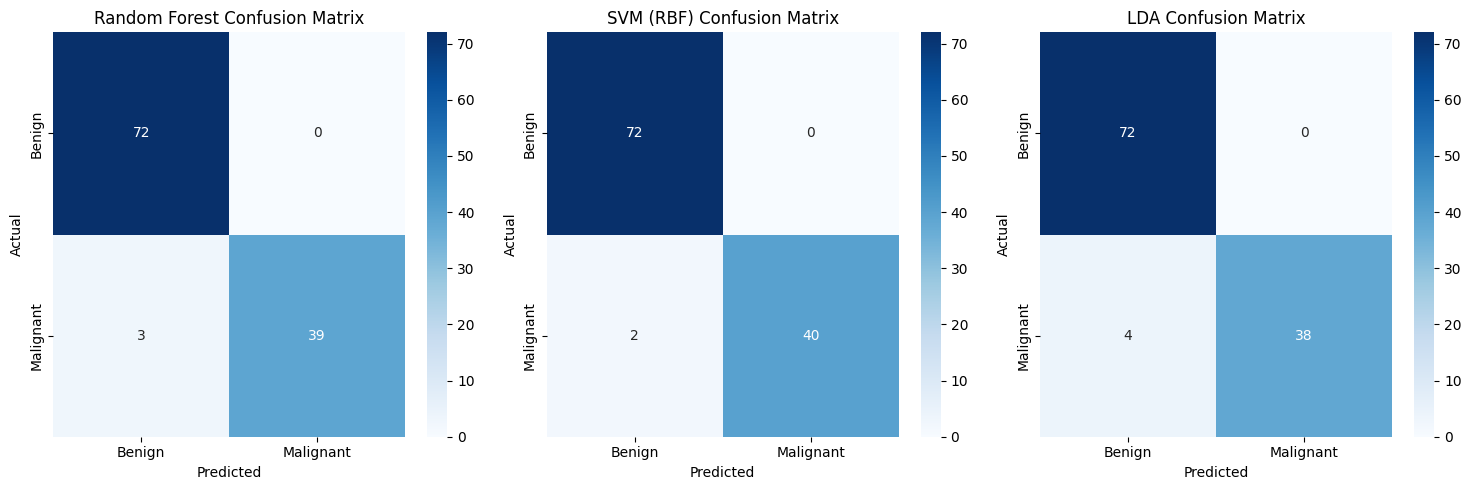


Results saved to 'model_comparison_results.csv'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import (accuracy_score, precision_score, 
                           recall_score, f1_score, confusion_matrix)

# 1. Load and preprocess data
def load_data():
    df = pd.read_csv('data.csv')
    df.drop(["id", "Unnamed: 32"], axis=1, inplace=True)
    df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
    df.dropna(inplace=True)
    df.drop_duplicates(inplace=True)
    return df

# 2. Prepare data
def prepare_data(df):
    X = df.drop('diagnosis', axis=1)
    y = df['diagnosis']
    
    # Split data (stratified)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Scale features (important for SVM and LDA)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test

# 3. Train models
def train_models(X_train, y_train):
    models = {
        "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
        "SVM (RBF)": SVC(kernel='rbf', C=10, gamma=0.01, probability=True),
        "LDA": LinearDiscriminantAnalysis()
    }
    
    for name, model in models.items():
        model.fit(X_train, y_train)
    
    return models

# 4. Evaluate and compare models
def evaluate_models(models, X_test, y_test):
    results = []
    
    for name, model in models.items():
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
        
        metrics = {
            'Model': name,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred),
            'Recall': recall_score(y_test, y_pred),
            'F1 Score': f1_score(y_test, y_pred),
            'Confusion Matrix': confusion_matrix(y_test, y_pred)
        }
        results.append(metrics)
    
    return pd.DataFrame(results)

# 5. Visualization functions
def plot_metrics_comparison(results_df):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    plt.figure(figsize=(12, 6))
    
    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 2, i)
        sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
        plt.title(f'{metric} Comparison')
        plt.ylim(0.85, 1.0)
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

def plot_confusion_matrices(models, X_test, y_test):
    plt.figure(figsize=(15, 5))
    
    for i, (name, model) in enumerate(models.items(), 1):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        
        plt.subplot(1, 3, i)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['Benign', 'Malignant'],
                   yticklabels=['Benign', 'Malignant'])
        plt.title(f'{name} Confusion Matrix')
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
    
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Load and prepare data
    df = load_data()
    X_train, X_test, y_train, y_test = prepare_data(df)
    
    # Train models
    models = train_models(X_train, y_train)
    
    # Evaluate models
    results_df = evaluate_models(models, X_test, y_test)
    
    # Display results
    print("Model Performance Comparison:")
    display(results_df.style.background_gradient(cmap='Blues', subset=['Accuracy', 'Precision', 'Recall', 'F1 Score']))
    
    # Visualizations
    plot_metrics_comparison(results_df)
    plot_confusion_matrices(models, X_test, y_test)
    
    # Save results
    results_df.to_csv("model_comparison_results.csv", index=False)
    print("\nResults saved to 'model_comparison_results.csv'")